# Protein deep learning

Although proteins are more of an interest for bioinformaticians than for cheminformaticians, they are a crucial element of drug design. Especially the 3D structure of proteins is very important because of its connection to the functioning of these biological machines in the organism.

## Protein representations

Proteins are chemical compounds, but considering their huge volume, they are often processed in a different way than small molecules. Typical representations are:

1. **Amino acid sequence** - proteins are strings of amino acids that can be represented as text, and by adding information about dihedral angles we can encode spatial information; we can process this representation using recurrent neural networks or transformers;
![dihedrals](https://upload.wikimedia.org/wikipedia/commons/c/c0/Protein_backbone_PhiPsiOmega_drawing.jpg)
2. **Graphs** - this representation is similar to molecular graphs known from the previous notebooks, but in this case to simplify the structure, only α carbons are represented encoding their amino acid residue; this representation can be processed using graph neural networks;
3. **Voxel grids** - this representation is constructed by surrounding the protein with a voxel grid (cubes that encode atoms they intersect); usually the voxel size can be set to 1 Å^3 (1 Å = 10^-10 m); this representation can be processed using 3D convolutional neural networks;
![voxel](https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0221347.g002&type=large)
4. **Distance or contact maps** - two-dimensional representation that represents distances between alpha carbons; we can binarize these distances using a selected threshold value, and such maps are called contact maps; this representation can be processed using (2D) convolutional neural networks;
![contact](https://upload.wikimedia.org/wikipedia/commons/8/8d/Protein_Contact_Map%2C_2-Color%2C_2QIP-A.png)
5. **Point clouds** - sets of not connected points (alpha carbons) encoding selected features (e.g. amino acid codes); this representation can be processed by neural networks adapted to processing point clouds, which are similar to graph neural networks;
6. **Meshes** - in this representation we only encode features of the protein surface; a graph is constructed by sampling a grid of points on the surface of proteins (a mesh), and the nodes can encode features related to the amino acids in the vicinity; this representation can be processed by graph neural networks.

## Problems that can be solved

1. **Inverse protein folding**, also known as protein design - a task that aims to find an amino acid sequence that folds to a given 3D structure;
2. **Binding site detection** - discovering cavities in proteins that can be used as binding sites for ligands; it can be realized as 3D grid segmentation using 3D convolutions (e.g. U-Net);
3. **Binding affinity prediction** - evaluation of the binding affinity given the ligand-protein complex (e.g. a ligand docked to the crystal structure of a protein).
4. **protein-based *de novo* design** - designing new ligands that match the binding site of a given protein.

![deepsite](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSv_unCC0dhDSQWwQipcKQSEulT064aq-WOnQ&usqp=CAU)

metody kodowania struktury białka:
- Kodujemy same węgle alfa - pomiędzy węglami mamy wiązania peptydowe (azot atd) - zamiast atomu kodowany jest aminokwas
- kodujemy w przestrzeni 3D - mamy węgle alfa wraz w połoeniem, zamiast sekwencji moemy użyć wiązań w przestrzni 3D
- Siatki vexeli - przypomina obraz 3D - piksele kodują kolory 
    - pixele 3 kanały - RGB - 3 kanały (obrazy z mikroskopji fluorescencyjnej (nie kodujemy poszczególne kolory - barwnik wiąe się tylko z np. jądrem komórkowym))
    - 2 wymiary + liczba kanałów - u białka - 4 w kanałach kodujemy typ atomu (zielone są węgle, czerwone to tlen, niebieskie to azot, białe to wodór)(czasami siarka w aminokwasach)
    -> mozna na tym puszczać sieci CNN
    (augmentacja - odpornośc na obroty)
- Mapy kontaktów i dystansów - 2D - macierz - odległości między węglami alfa - jeśli odległość jest mniejsza niż 8 Å to jest 1, jeśli większa to 0
    - mirzymy wystans pomiędzy animokwasami - sąsiadują ze sobą pomimo tego, ze są oddalone - białko się zwinęło
    - uzywane w alfafoldzie do odl w homologach

Zastosowania: 
- przewidywanie powinowactwa - białko kodujemy za pomocą siatki vexeli
- przewidywania powinowactwa np Ki 
- kodowanie białek - do przewidywania nowych ligandów - za pomocą kieszeni wiąącej mozemy projektować nowy ligand


---

<div style="display: flex; justify-content: space-between">
    <div style="width: 20%; display: inline-block; margin: 20px">
        <img src="../../assets/profile4.png" width="100%">
    </div>
    <div style="width: 60%; display: inline-block; margin: 20px">
        <p><strong>Ami:</strong> Binding site prediction is a crucial aspect of drug discovery. It involves identifying regions on a target molecule, such as a protein, where a small molecule drug can bind and exert its therapeutic effects. However, not all binding sites are readily accessible or amenable to drug binding, leading to the concept of "undruggable targets." These undruggable targets often pose challenges due to their structural complexity, dynamic nature, or lack of suitable binding pockets for small molecule drugs. Overcoming these hurdles requires innovative approaches such as fragment-based drug design, allosteric modulation, or the development of biologics like monoclonal antibodies or gene therapies. Advancements in computational modeling, high-throughput screening, and structural biology techniques are continuously expanding our ability to predict and target these challenging binding sites, offering promising avenues for the discovery of novel therapeutics.
</p>
    </div>
</div>

---

**Exercise 1:** Implement the voxel representation of a protein.

**Exercise 2:** Implement a convolutional neural network that processes this representation. In the case of voxel grids, check if your voxel grid can be passed through a 3D convolution (imported from PyTorch) and if the output shape is what you expected.

## Example implementation of voxel encoding

In [1]:
from rdkit import Chem
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

In [2]:
symbols = ['C', 'N', 'O', 'S']

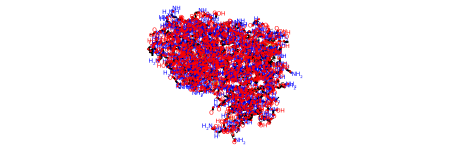

In [9]:
mol = Chem.MolFromPDBFile('../L4-molecular-docking/4ivt.pdb')
# mol.GetNumAtoms()
mol

In [ ]:
def get_atom_positions(mol):
    positions = []
    for atom in mol.GetAtoms():
        pos = atom.GetIdx()
        positions.append(pos)
    return np.array(positions)

In [11]:
pos = mol.GetConformer().GetPositions()
pos, pos.shape

(array([[ 9.527, 19.931, 33.672],
        [10.971, 20.   , 33.868],
        [11.442, 21.45 , 33.989],
        ...,
        [37.518, 41.778, -0.514],
        [38.621, 43.221,  1.277],
        [38.44 , 42.432, -1.517]]),
 (2911, 3))

In [38]:
# Load protein from a PDB file
mol = Chem.MolFromPDBFile('../L4-molecular-docking/4ivt.pdb')
atoms_num = mol.GetNumAtoms()
pos = mol.GetConformer().GetPositions() # Create a position matrix of dimensions number_of_atoms x 3
bounding_box = np.floor(pos.min(axis=0)),  np.ceil(pos.max(axis=0))  # Create a bounding box definition, e.g. two corners of the protein bounding box
box_size = bounding_box[1] - bounding_box[0]  # Calculate bounding box size (you can use 1 unit as the voxel size)
grid = np.zeros((*box_size.astype(int), 4))  # Create an empty grid with 4 channels (number of symbols) and size corresponding to the bounding box

In [26]:
grid.shape

(65, 60, 47, 4)

In [14]:
#bounding box
bounding_box = np.floor(pos.min(axis=0)),  np.ceil(pos.max(axis=0))
bounding_box

(array([-10., -11., -12.]), array([55., 49., 35.]))

In [16]:
box_size = bounding_box[1] - bounding_box[0]
box_size # granularność siatki to 1 angstrom


array([65., 60., 47.])

In [39]:

def atom_chanel(symbol):
    if symbol in symbols:
        return symbols.index(symbol)
    else: return len(symbols)

for i, atom in enumerate(mol.GetAtoms()):
    symbol = atom.GetSymbol()
    position = np.floor(pos[i]- bounding_box[0]).astype(int) #przesuwamy do początku układu współrzędnych

    # print(symbol, position)
    channel = atom_chanel(symbol)
    grid[position[0], position[1], position[2], channel] = 1

    # ...  # Map atoms onto the grid, use 1 to mark the corresponding grid position and channel
    # # tip: you will need the atom symbol and atom position aligned with the grid
grid.min(), grid.max()

(0.0, 1.0)

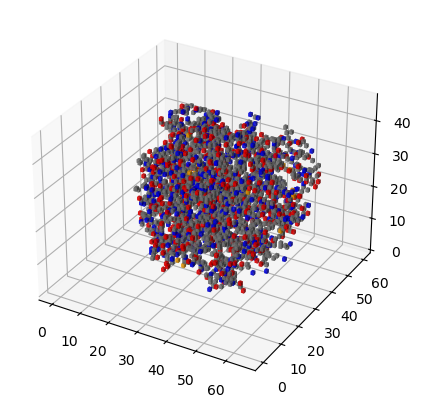

In [33]:
%matplotlib inline

# The code below will plot your voxel grid
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
ax.voxels(grid[:, :, :, 0], facecolors='grey', alpha=0.7)
ax.voxels(grid[:, :, :, 1], facecolors='blue', alpha=0.7)
ax.voxels(grid[:, :, :, 2], facecolors='red', alpha=0.7)
ax.voxels(grid[:, :, :, 3], facecolors='orange', alpha=0.7)
plt.show()

In [34]:
np.save('grid.npy', grid)

# CNN for processing proteins

(the architecture can be inspired, e.g., by [DeepSite](https://academic.oup.com/bioinformatics/article/33/19/3036/3859178))

---

<div style="display: flex; justify-content: space-between">
    <div style="width: 20%; display: inline-block; margin: 20px">
        <img src="../../assets/profile3.png" width="100%">
    </div>
    <div style="width: 60%; display: inline-block; margin: 20px">
        <p><strong>Orion:</strong> 
In the realm of protein structure analysis, employing convolutional neural network (CNN) architectures on voxel representations offers a powerful means to glean insights. Constructing a CNN tailored to capture the protein context and predict binding affinity involves a thoughtful architectural design. Initially, the CNN utilizes convolutional layers to extract intricate local features from the voxel representation of the protein structure, effectively capturing the spatial relationships within the 3D grid. To incorporate global context, global pooling layers such as global average pooling or global max pooling are strategically placed after the convolutional layers. These pooling layers aggregate the learned features across the entire protein structure, enabling the model to comprehend the holistic context necessary for accurate binding affinity prediction. Finally, the pooled features are fed into fully connected layers followed by a regression layer to predict the binding affinity. This comprehensive CNN architecture adeptly integrates both local and global information, facilitating precise predictions of binding affinity by considering the nuanced interactions within the protein structure.







</p>
    </div>
</div>

---

In [ ]:
#deepsite hostuje - mona wrzucić białko i odkryć w nim kieszenie wiązące
#max pooling agreguje pixele - w jeden pixel

In [68]:
import torch

model = torch.nn.Sequential(
    torch.nn.Conv3d(4, 32, (8,8,8), padding=1),
    torch.nn.ReLU(),
    torch.nn.MaxPool3d(2),
    torch.nn.Dropout3d(p=0.25),
    torch.nn.Conv3d(32, 48, (4,4,4), padding=1),
    torch.nn.ReLU(),
    torch.nn.MaxPool3d(2),
    torch.nn.Dropout3d(p=0.25),
    torch.nn.Conv3d(48, 64, 3, padding=1),
    torch.nn.ReLU(),
    torch.nn.MaxPool3d(2),
    torch.nn.Dropout3d(p=0.25),
    torch.nn.Flatten(),
    torch.nn.Linear(64, 1),
)

In [69]:
print(grid.shape)
print(torch.FloatTensor(grid).unsqueeze(0).movedim(4, 1)[:, :, :16, :16, :16].shape)
torch.FloatTensor(grid).unsqueeze(0).shape, torch.FloatTensor(grid).unsqueeze(0).movedim(4, 1).shape

(65, 60, 47, 4)
torch.Size([1, 4, 16, 16, 16])


(torch.Size([1, 65, 60, 47, 4]), torch.Size([1, 4, 65, 60, 47]))

PBD bind - struktury z PBD - białka związane z ligandami
wyodrębnili ligand i osobno białko (kieszeń) 

In [70]:
pred = model(torch.FloatTensor(grid).unsqueeze(0).movedim(4, 1)[:, :, :16, :16, :16])
pred

tensor([[-0.1188]], grad_fn=<AddmmBackward0>)

In [ ]:
class ModelCNN(torch.nn.Model):
    def __init__(self):
        super(ModelCNN, self).__init__()
        self.net = torch.nn.Sequential(
            torch.nn.Conv3d(4, 32, (8,8,8), padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool3d(2),
            torch.nn.Dropout3d(p=0.25),
            torch.nn.Conv3d(32, 48, (4,4,4), padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool3d(2),
            torch.nn.Dropout3d(p=0.25),
            torch.nn.Conv3d(48, 64, 3, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool3d(2),
            torch.nn.Dropout3d(p=0.25),
            torch.nn.Flatten(),
            torch.nn.Linear(64, 1),
        )

    def forward(self, x):
        return self.net(x)
    
    
model = ModelCNN()

epochs = 10
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()

for epoch in range(epochs):
    optimizer.zero_grad()
    pred = model(torch.FloatTensor(grid).unsqueeze(0).movedim(4, 1))
    loss = criterion(pred, torch.tensor([1.0]))
    loss.backward()
    optimizer.step()
    print(f'Epoch: {epoch}, Loss: {loss.item()}')

mona zainspirować się pracą DeepSite - do klasyfikacji - scpbd
do wykrywania kieszeni wiązącej
wszystko powyej 0.7 - jest kieszenią wiążącą